In [ ]:
#MONEYBALL ANALYSIS

In [1]:
library('dplyr')
library('ggplot2')

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
bat=read.csv('Batting.csv')
sal=read.csv('Salaries.csv')

In [5]:
head(bat)

playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
aardsda01,2004,1,SFN,NL,11,11,0,0,0,...,0,0,0,0,0,0,0,0,0,11
aardsda01,2006,1,CHN,NL,45,43,2,0,0,...,0,0,0,0,0,0,1,0,0,45
aardsda01,2007,1,CHA,AL,25,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aardsda01,2008,1,BOS,AL,47,5,1,0,0,...,0,0,0,1,0,0,0,0,0,5
aardsda01,2009,1,SEA,AL,73,3,0,0,0,...,0,0,0,0,0,0,0,0,0,NA
aardsda01,2010,1,SEA,AL,53,4,0,0,0,...,0,0,0,0,0,0,0,0,0,NA


In [6]:
head(sal)

yearID,teamID,lgID,playerID,salary
1985,BAL,AL,murraed02,1472819
1985,BAL,AL,lynnfr01,1090000
1985,BAL,AL,ripkeca01,800000
1985,BAL,AL,lacyle01,725000
1985,BAL,AL,flanami01,641667
1985,BAL,AL,boddimi01,625000


In [8]:
str(bat)

'data.frame':	97889 obs. of  24 variables:
 $ playerID : Factor w/ 18107 levels "aardsda01","aaronha01",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ yearID   : int  2004 2006 2007 2008 2009 2010 2012 1954 1955 1956 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID   : Factor w/ 149 levels "ALT","ANA","ARI",..: 117 35 33 16 116 116 93 80 80 80 ...
 $ lgID     : Factor w/ 6 levels "AA","AL","FL",..: 4 4 2 2 2 2 2 4 4 4 ...
 $ G        : int  11 45 25 47 73 53 1 122 153 153 ...
 $ G_batting: int  11 43 2 5 3 4 NA 122 153 153 ...
 $ AB       : int  0 2 0 1 0 0 NA 468 602 609 ...
 $ R        : int  0 0 0 0 0 0 NA 58 105 106 ...
 $ H        : int  0 0 0 0 0 0 NA 131 189 200 ...
 $ X2B      : int  0 0 0 0 0 0 NA 27 37 34 ...
 $ X3B      : int  0 0 0 0 0 0 NA 6 9 14 ...
 $ HR       : int  0 0 0 0 0 0 NA 13 27 26 ...
 $ RBI      : int  0 0 0 0 0 0 NA 69 106 92 ...
 $ SB       : int  0 0 0 0 0 0 NA 2 3 2 ...
 $ CS       : int  0 0 0 0 0 0 NA 2 1 4 ...
 $ BB       : int  0 0 0 0 0 0 NA 28 49 37 ...
 $ S

In [9]:
str(sal)

'data.frame':	23956 obs. of  5 variables:
 $ yearID  : int  1985 1985 1985 1985 1985 1985 1985 1985 1985 1985 ...
 $ teamID  : Factor w/ 35 levels "ANA","ARI","ATL",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ lgID    : Factor w/ 2 levels "AL","NL": 1 1 1 1 1 1 1 1 1 1 ...
 $ playerID: Factor w/ 4668 levels "aardsda01","aasedo01",..: 2961 2517 3566 2304 1332 394 4061 2604 3634 2722 ...
 $ salary  : int  1472819 1090000 800000 725000 641667 625000 581250 560000 558333 547143 ...


In [10]:
head(bat$AB)

[1] 0 2 0 1 0 0

In [11]:
head(bat$X2B)

[1] 0 0 0 0 0 0

#Feature Engineering

Batting Average
Onbase Percentage
Slugging Percentage

In [12]:
#Batting Average

bat$BA = bat$H/bat$AB

In [13]:
tail(bat$BA)

[1] 0.0000000 0.1230769 0.2746479 0.1470588 0.2745098 0.2138728

In [14]:
#Onbase Percentage

bat$OBP = (bat$H+bat$BB+bat$HBP)/(bat$AB+bat$BB+bat$HBP+bat$SF)

In [15]:
tail(bat$OBP)

[1] 0.0000000 0.1343284 0.3443918 0.1470588 0.3543759 0.2901554

In [16]:
#Slugging percentage

bat$X1B = bat$H-bat$X2B-bat$X3B-bat$HR

In [17]:
bat$SLG = ((1 * bat$X1B)+(2 * bat$X2B)+(3 * bat$X3B)+(4 * bat$HR))/bat$AB 

In [18]:
str(bat)

'data.frame':	97889 obs. of  28 variables:
 $ playerID : Factor w/ 18107 levels "aardsda01","aaronha01",..: 1 1 1 1 1 1 1 2 2 2 ...
 $ yearID   : int  2004 2006 2007 2008 2009 2010 2012 1954 1955 1956 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID   : Factor w/ 149 levels "ALT","ANA","ARI",..: 117 35 33 16 116 116 93 80 80 80 ...
 $ lgID     : Factor w/ 6 levels "AA","AL","FL",..: 4 4 2 2 2 2 2 4 4 4 ...
 $ G        : int  11 45 25 47 73 53 1 122 153 153 ...
 $ G_batting: int  11 43 2 5 3 4 NA 122 153 153 ...
 $ AB       : int  0 2 0 1 0 0 NA 468 602 609 ...
 $ R        : int  0 0 0 0 0 0 NA 58 105 106 ...
 $ H        : int  0 0 0 0 0 0 NA 131 189 200 ...
 $ X2B      : int  0 0 0 0 0 0 NA 27 37 34 ...
 $ X3B      : int  0 0 0 0 0 0 NA 6 9 14 ...
 $ HR       : int  0 0 0 0 0 0 NA 13 27 26 ...
 $ RBI      : int  0 0 0 0 0 0 NA 69 106 92 ...
 $ SB       : int  0 0 0 0 0 0 NA 2 3 2 ...
 $ CS       : int  0 0 0 0 0 0 NA 2 1 4 ...
 $ BB       : int  0 0 0 0 0 0 NA 28 49 37 ...
 $ S

In [19]:
summary(bat)

      playerID         yearID         stint           teamID        lgID      
 mcguide01:   31   Min.   :1871   Min.   :1.000   CHN    : 4720   AA  : 1890  
 henderi01:   29   1st Qu.:1931   1st Qu.:1.000   PHI    : 4621   AL  :44369  
 newsobo01:   29   Median :1970   Median :1.000   PIT    : 4575   FL  :  470  
 johnto01 :   28   Mean   :1962   Mean   :1.077   SLN    : 4535   NL  :49944  
 kaatji01 :   28   3rd Qu.:1995   3rd Qu.:1.000   CIN    : 4393   PL  :  147  
 ansonca01:   27   Max.   :2013   Max.   :5.000   CLE    : 4318   UA  :  332  
 (Other)  :97717                                  (Other):70727   NA's:  737  
       G            G_batting            AB              R         
 Min.   :  1.00   Min.   :  0.00   Min.   :  0.0   Min.   :  0.00  
 1st Qu.: 13.00   1st Qu.:  7.00   1st Qu.:  9.0   1st Qu.:  0.00  
 Median : 35.00   Median : 32.00   Median : 61.0   Median :  5.00  
 Mean   : 51.65   Mean   : 49.13   Mean   :154.1   Mean   : 20.47  
 3rd Qu.: 81.00   3rd Qu.: 8

In [20]:
bat=subset(bat, yearID >= 1985)

In [21]:
summary(bat)

      playerID         yearID         stint          teamID      lgID      
 moyerja01:   27   Min.   :1985   Min.   :1.00   SDN    : 1313   AA:    0  
 mulhote01:   26   1st Qu.:1993   1st Qu.:1.00   CLE    : 1306   AL:17226  
 weathda01:   26   Median :2000   Median :1.00   PIT    : 1299   FL:    0  
 maddugr01:   25   Mean   :2000   Mean   :1.08   NYN    : 1297   NL:18426  
 sierrru01:   25   3rd Qu.:2007   3rd Qu.:1.00   BOS    : 1279   PL:    0  
 thomeji01:   25   Max.   :2013   Max.   :4.00   CIN    : 1279   UA:    0  
 (Other)  :35498                                 (Other):27879             
       G           G_batting            AB              R         
 Min.   :  1.0   Min.   :  0.00   Min.   :  0.0   Min.   :  0.00  
 1st Qu.: 14.0   1st Qu.:  4.00   1st Qu.:  3.0   1st Qu.:  0.00  
 Median : 34.0   Median : 27.00   Median : 47.0   Median :  4.00  
 Mean   : 51.7   Mean   : 46.28   Mean   :144.7   Mean   : 19.44  
 3rd Qu.: 77.0   3rd Qu.: 77.00   3rd Qu.:241.0   3rd Qu.

In [23]:
#Merging sal and bat data


combo = merge(bat,sal,by=c('playerID','yearID'))

In [24]:
summary(combo)

      playerID         yearID         stint          teamID.x     lgID.x    
 moyerja01:   27   Min.   :1985   Min.   :1.000   LAN    :  940   AA:    0  
 thomeji01:   25   1st Qu.:1993   1st Qu.:1.000   PHI    :  937   AL:12292  
 weathda01:   25   Median :1999   Median :1.000   BOS    :  935   FL:    0  
 vizquom01:   24   Mean   :1999   Mean   :1.098   NYA    :  928   NL:13105  
 gaettga01:   23   3rd Qu.:2006   3rd Qu.:1.000   CLE    :  920   PL:    0  
 griffke02:   23   Max.   :2013   Max.   :4.000   SDN    :  914   UA:    0  
 (Other)  :25250                                  (Other):19823             
       G            G_batting            AB              R         
 Min.   :  1.00   Min.   :  0.00   Min.   :  0.0   Min.   :  0.00  
 1st Qu.: 26.00   1st Qu.:  8.00   1st Qu.:  5.0   1st Qu.:  0.00  
 Median : 50.00   Median : 42.00   Median : 85.0   Median :  9.00  
 Mean   : 64.06   Mean   : 57.58   Mean   :182.4   Mean   : 24.71  
 3rd Qu.:101.00   3rd Qu.:101.00   3rd Qu.:3

#Analyzing the lost players jason Giambi, Johnny Damon, Rainer Gustavo

In [25]:
lost=subset(combo,playerID %in% c('giambja01','damonjo01','saenzol01'))

In [26]:
lost

,playerID,yearID,stint,teamID.x,lgID.x,G,G_batting,AB,R,H,...,SF,GIDP,G_old,BA,OBP,X1B,SLG,teamID.y,lgID.y,salary
5135,damonjo01,1995,1,KCA,AL,47,47,188,32,53,...,3,2,47,0.2819149,0.3235294,34,0.4414894,KCA,AL,109000
5136,damonjo01,1996,1,KCA,AL,145,145,517,61,140,...,5,4,145,0.2707930,0.3129496,107,0.3675048,KCA,AL,180000
5137,damonjo01,1997,1,KCA,AL,146,146,472,70,130,...,1,3,146,0.2754237,0.3378378,102,0.3855932,KCA,AL,240000
5138,damonjo01,1998,1,KCA,AL,161,161,642,104,178,...,3,4,161,0.2772586,0.3394625,120,0.4392523,KCA,AL,460000
5139,damonjo01,1999,1,KCA,AL,145,145,583,101,179,...,4,13,145,0.3070326,0.3789954,117,0.4768439,KCA,AL,2100000
5140,damonjo01,2000,1,KCA,AL,159,159,655,136,214,...,12,7,159,0.3267176,0.3819918,146,0.4946565,KCA,AL,4000000
5141,damonjo01,2001,1,OAK,AL,155,155,644,108,165,...,4,7,155,0.2562112,0.3235294,118,0.3633540,OAK,AL,7100000
5142,damonjo01,2002,1,BOS,AL,154,154,623,118,178,...,5,4,154,0.2857143,0.3562232,119,0.4430177,BOS,AL,7250000
5143,damonjo01,2003,1,BOS,AL,145,145,608,103,166,...,6,5,145,0.2730263,0.3450292,116,0.4046053,BOS,AL,7500000
5144,damonjo01,2004,1,BOS,AL,150,150,621,123,189,...,3,8,150,0.3043478,0.3803419,128,0.4766506,BOS,AL,8000000


In [27]:
lost = subset(lost,yearID == 2001)

In [28]:
lost = lost[,c('playerID','H','X2B','X3B','HR','OBP','SLG','BA','AB')]

In [29]:
lost

,playerID,H,X2B,X3B,HR,OBP,SLG,BA,AB
5141,damonjo01,165,34,4,9,0.3235294,0.3633540,0.2562112,644
7878,giambja01,178,47,2,38,0.4769001,0.6596154,0.3423077,520
20114,saenzol01,67,21,1,9,0.2911765,0.3836066,0.2196721,305


#Replacement Players Constraints


salary of three players cannot br greater than 15 million dollars
Their combined number of At bats shoud be greater than or equal to the lost players
OBP must be greater than or equal to the mean OBP of the lost players




In [30]:
combo_2001 = subset(combo,yearID == 2001)

In [31]:
combo_2001

,playerID,yearID,stint,teamID.x,lgID.x,G,G_batting,AB,R,H,...,SF,GIDP,G_old,BA,OBP,X1B,SLG,teamID.y,lgID.y,salary
17,abbotje01,2001,1,FLO,NL,28,28,42,5,11,...,0,1,28,0.26190476,0.32608696,8,0.33333333,FLO,NL,300000
37,abbotku01,2001,1,ATL,NL,6,6,9,0,2,...,0,0,6,0.22222222,0.22222222,2,0.22222222,ATL,NL,600000
44,abbotpa01,2001,1,SEA,AL,28,2,4,0,1,...,0,0,2,0.25000000,0.25000000,1,0.25000000,SEA,AL,1700000
62,abreubo01,2001,1,PHI,NL,162,162,588,118,170,...,9,13,162,0.28911565,0.39346591,87,0.54251701,PHI,NL,4983000
130,adamste01,2001,1,LAN,NL,43,41,39,2,2,...,1,0,41,0.05128205,0.11627907,1,0.07692308,LAN,NL,2600000
157,agbaybe01,2001,1,NYN,NL,91,91,296,28,82,...,1,11,91,0.27702703,0.36390533,60,0.39864865,NYN,NL,260000
258,alfonan01,2001,1,FLO,NL,58,54,0,0,0,...,0,0,54,NaN,NaN,0,NaN,FLO,NL,2450000
271,alfoned01,2001,1,NYN,NL,124,124,457,64,111,...,5,7,124,0.24288840,0.32239382,72,0.40262582,NYN,NL,5750000
287,alicelu01,2001,1,KCA,AL,113,113,387,44,106,...,1,6,113,0.27390181,0.32048193,82,0.36692506,KCA,AL,800000
299,allench01,2001,1,MIN,AL,57,57,175,20,46,...,1,7,57,0.26285714,0.33333333,27,0.42857143,MIN,AL,240000


In [33]:
sum(lost$AB)

[1] 1469

In [34]:
mean(lost$OBP)

[1] 0.3638687

SO AB SHOUD BE EQUAL OR GREATER THAN 1469
MEAN OBP SHOUD BE GREATER THAN OR EQUAL TO 0.363



Warning message:
"Removed 168 rows containing missing values (geom_point)."

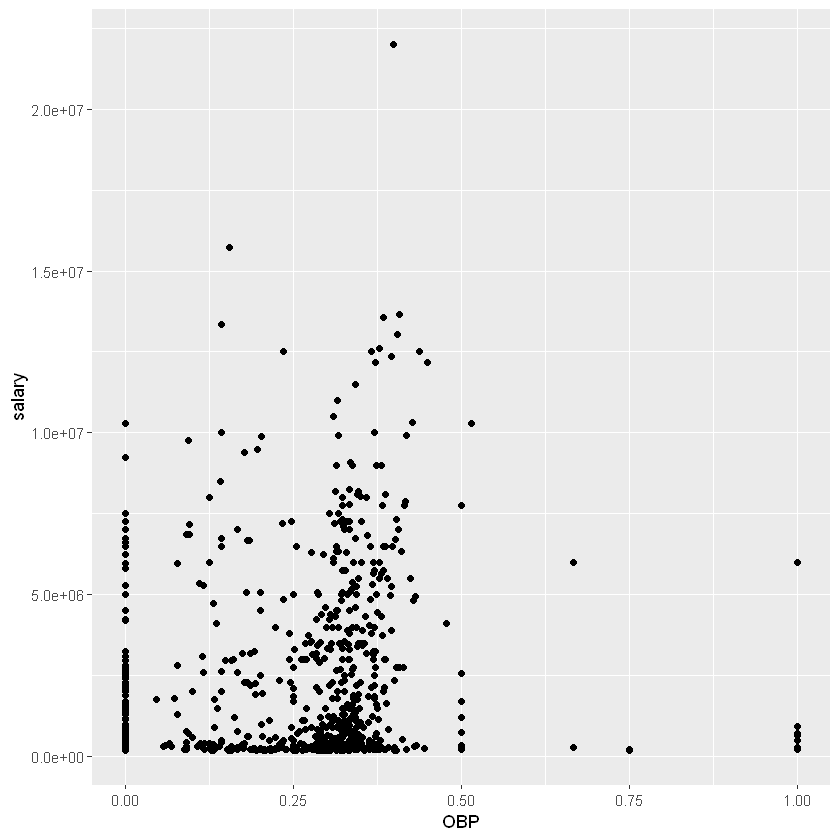

In [35]:
#PLOTTING SALARIES AND OBP

ggplot(combo_2001,aes(x=OBP,y=salary))+ geom_point()

Going to consider players less than 8 million dollars and OBP equal to 0



In [36]:
combo_2001 = filter(combo_2001, salary < 8000000,OBP >= 0)

Lets try to find players with AB higher than 500



In [37]:
combo_2001 = filter(combo_2001, AB >= 500)

Sort by OBP


In [38]:
possible = head(arrange(combo_2001, desc(OBP)),10)

In [39]:
possible = possible[,c('playerID','OBP','AB','salary')]

In [40]:
possible

playerID,OBP,AB,salary
giambja01,0.4769001,520,4103333
heltoto01,0.4316547,587,4950000
berkmla01,0.4302326,577,305000
gonzalu01,0.4285714,609,4833333
thomeji01,0.4161491,526,7875000
alomaro01,0.4146707,575,7750000
edmonji01,0.4102142,500,6333333
gilesbr02,0.4035608,576,7333333
pujolal01,0.4029630,590,200000
olerujo01,0.4011799,572,6700000


In [41]:
#Giambja was the one of the lost players so we taken next three players


possible[2:4,]

,playerID,OBP,AB,salary
2,heltoto01,0.4316547,587,4950000
3,berkmla01,0.4302326,577,305000
4,gonzalu01,0.4285714,609,4833333
